In [7]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


In [8]:
train_gen = image_dataset_from_directory(directory="C:/Downloads/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="C:/Downloads/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [9]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 85, 85, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                  

In [10]:
ep = 5
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/5
2197/2197 [==============================] - 400s 180ms/step - loss: 1.5759 - accuracy: 0.5405 - val_loss: 0.5929 - val_accuracy: 0.8136
Epoch 2/5
2197/2197 [==============================] - 338s 154ms/step - loss: 0.4611 - accuracy: 0.8524 - val_loss: 0.3218 - val_accuracy: 0.8903
Epoch 3/5
2197/2197 [==============================] - 355s 162ms/step - loss: 0.2603 - accuracy: 0.9149 - val_loss: 0.2231 - val_accuracy: 0.9284
Epoch 4/5
2197/2197 [==============================] - 356s 162ms/step - loss: 0.1771 - accuracy: 0.9410 - val_loss: 0.1942 - val_accuracy: 0.9374
Epoch 5/5
2197/2197 [==============================] - 360s 164ms/step - loss: 0.1285 - accuracy: 0.9568 - val_loss: 0.1649 - val_accuracy: 0.9491


In [11]:
import h5py
model.save('cnn.h5')

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


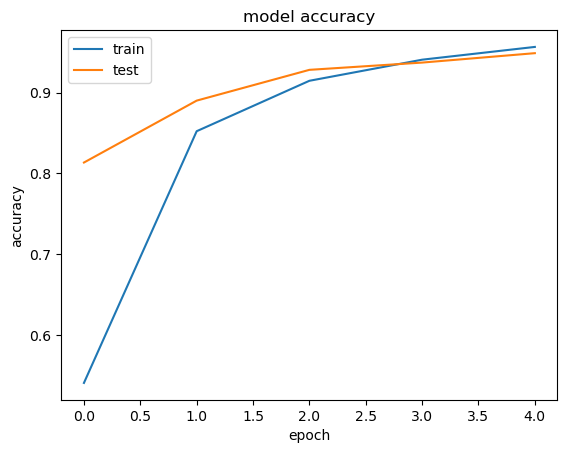

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



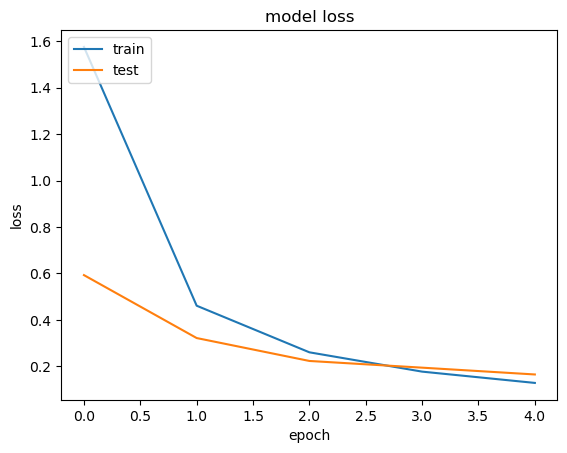

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
from keras.models import load_model
classifier = load_model('cnn.h5')

In [16]:
import os

In [17]:
from tensorflow.keras.preprocessing import image

img_path = 'C:/Downloads/new-plant-diseases-dataset/test/test/AppleCedarRust3.JPG'
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = classifier.predict(img_array)

class_names = sorted(os.listdir('C:/Downloads/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]

print(f"The model predicts: {predicted_class_name}")


1/1 [==============================] - 1s 639ms/step
The model predicts: Apple___Cedar_apple_rust
